In [22]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [3]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df=df.loc[termfilter]

In [9]:
#gradefilter=df['grade']=='C'
#df=df[gradefilter]

In [5]:
df['purpose'].value_counts()
df['purpose'].value_counts(normalize=True)
#purpose contains
#emp title contains
#add % of total column (in Excel?)

debt_consolidation    0.588047
credit_card           0.223373
home_improvement      0.056913
other                 0.050804
major_purchase        0.021075
small_business        0.015040
car                   0.011575
medical               0.009870
moving                0.006422
vacation              0.005333
wedding               0.005024
house                 0.004865
educational           0.000905
renewable_energy      0.000753
Name: purpose, dtype: float64

In [10]:
#Charge Off Probability
Total=df.groupby(['purpose'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['purpose'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['purpose']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,purpose,funded_amnt
11,small_business,0.21
2,debt_consolidation,0.17
5,house,0.17
0,car,0.16
1,credit_card,0.16
4,home_improvement,0.16
7,medical,0.16
6,major_purchase,0.15
8,moving,0.15
9,other,0.15


In [16]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    #ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

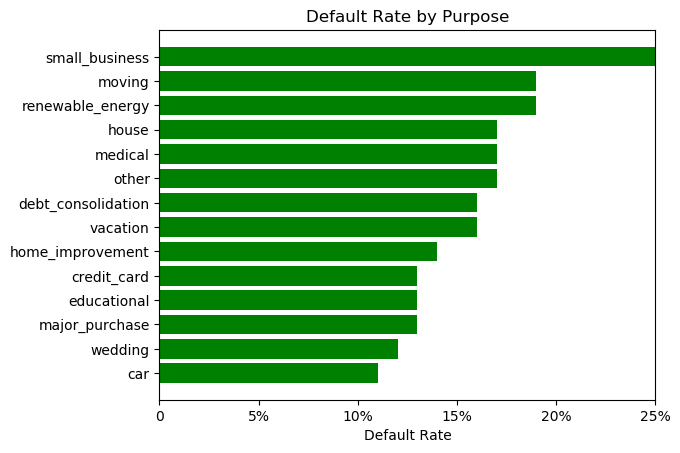

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by Loan Purpose')
ax.set_xlim(0,.25)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Default Rate by Purpose')

plt.show()

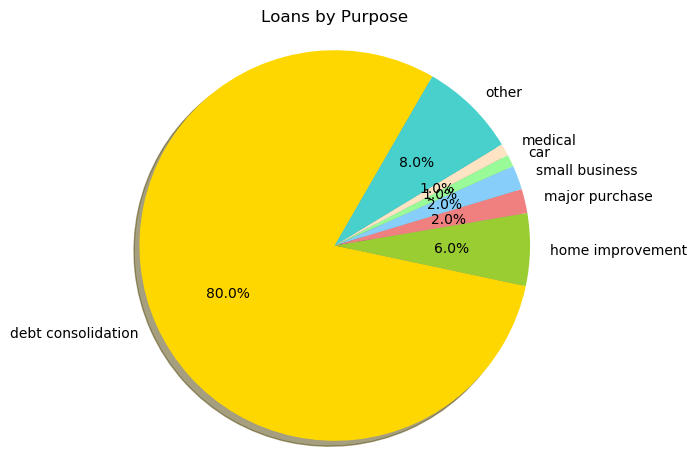

In [8]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['debt consolidation','home improvement','major purchase','small business','car','medical','other']
sizes = [80,6,2,2,1,1,8]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','palegreen','bisque','mediumturquoise','cadetblue','magenta','crimson','goldenrod']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)

plt.subplots_adjust(top=1, bottom=.1, left=.1, right=1, hspace=1,
                    wspace=.5)
plt.title('Loans by Purpose')
plt.axis('equal')
plt.show()
#create other

In [28]:
df['performance']=(df['total_pymnt']/df['funded_amnt'])-1

#df filter for 36 month term
termfilterPurpose1= (df['purpose'] == 'debt_consolidation') | (df['purpose'] == 'credit_card')
termfilterPurpose2= (df['purpose'] == 'small_business') | (df['purpose'] == 'renewable_energy')
dfPurpose1=df.loc[termfilterPurpose1]
dfPurpose2=df.loc[termfilterPurpose2]

pf = dfPurpose1['performance']
pf1=dfPurpose2['performance']

import scipy.stats as st
st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-9.8968569364347925, pvalue=4.3229646001992922e-23)

In [25]:
dfPurpose2['performance'].mean()

0.052819663945652844

In [26]:
dfPurpose1['performance'].mean()

0.08259225924658574